Prophet model from facebook to be used in time series analysis

[Dataset](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data)

In [1]:
# import librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df= pd.read_csv("DailyDelhiClimateTrain.csv", index_col= "date", parse_dates=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [4]:
df.shape

(1462, 4)

In [5]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [6]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

<Axes: xlabel='date', ylabel='meantemp'>

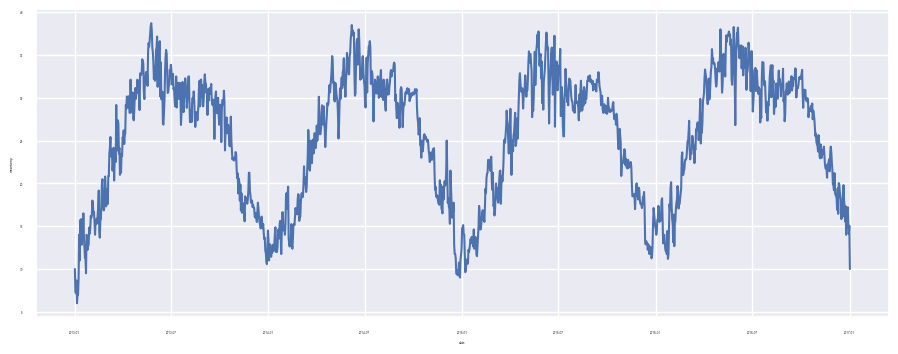

In [7]:
sns.set(rc={"figure.figsize": (11,4)}, font_scale=0.2, style="darkgrid")
sns.lineplot(data=df, x="date", y="meantemp")

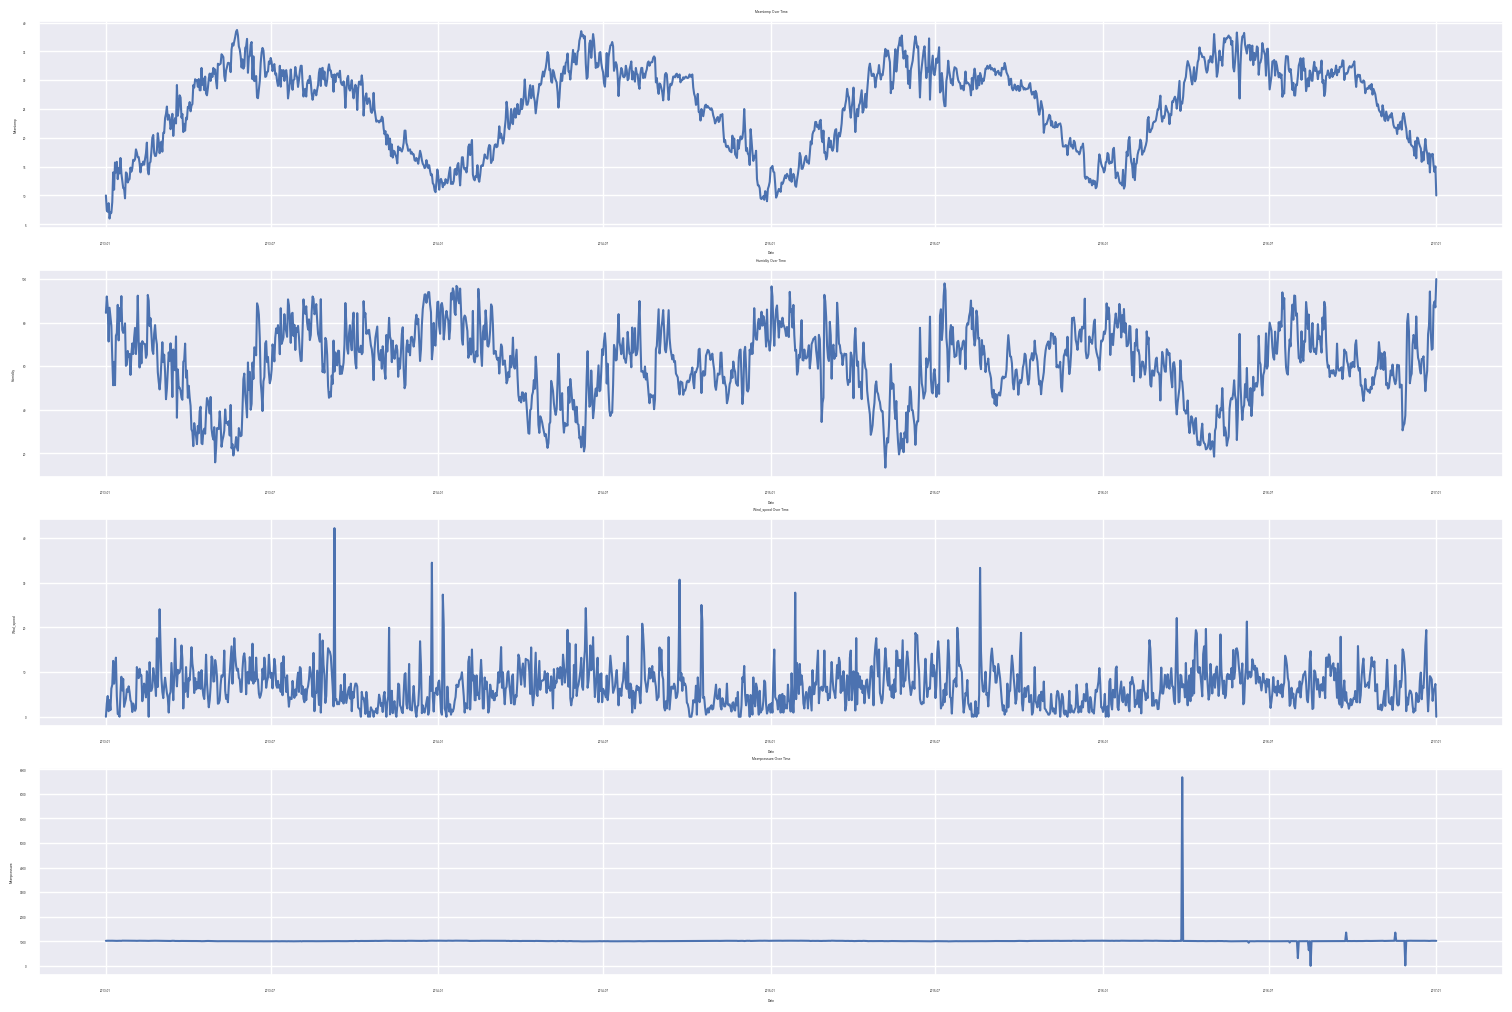

In [8]:
# Create a line plot for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 1, i)
    sns.lineplot(x=df.index, y=df[col])
    plt.title(f'{col.capitalize()} Over Time')
    plt.xlabel('Date')
    plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()


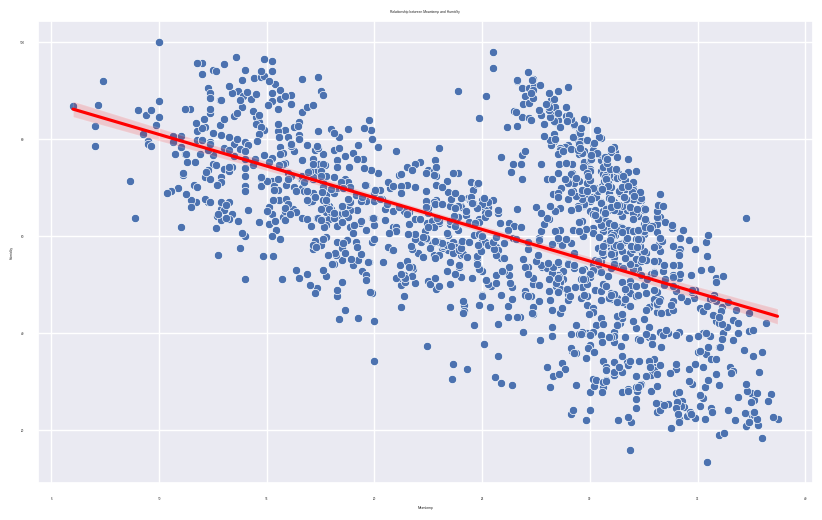

In [9]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='meantemp', y='humidity', data=df)
sns.regplot(x='meantemp', y='humidity', data=df, scatter=False, line_kws={'color': 'red'})
plt.title('Relationship between Meantemp and Humidity')
plt.xlabel('Meantemp')
plt.ylabel('Humidity')
plt.show()


In [10]:
# Calculate Pearson correlation between temperature and humidity
print(f"Pearson correlation between temperature and humidity: {df['meantemp'].corr(df['humidity']):.2f}")


Pearson correlation between temperature and humidity: -0.57


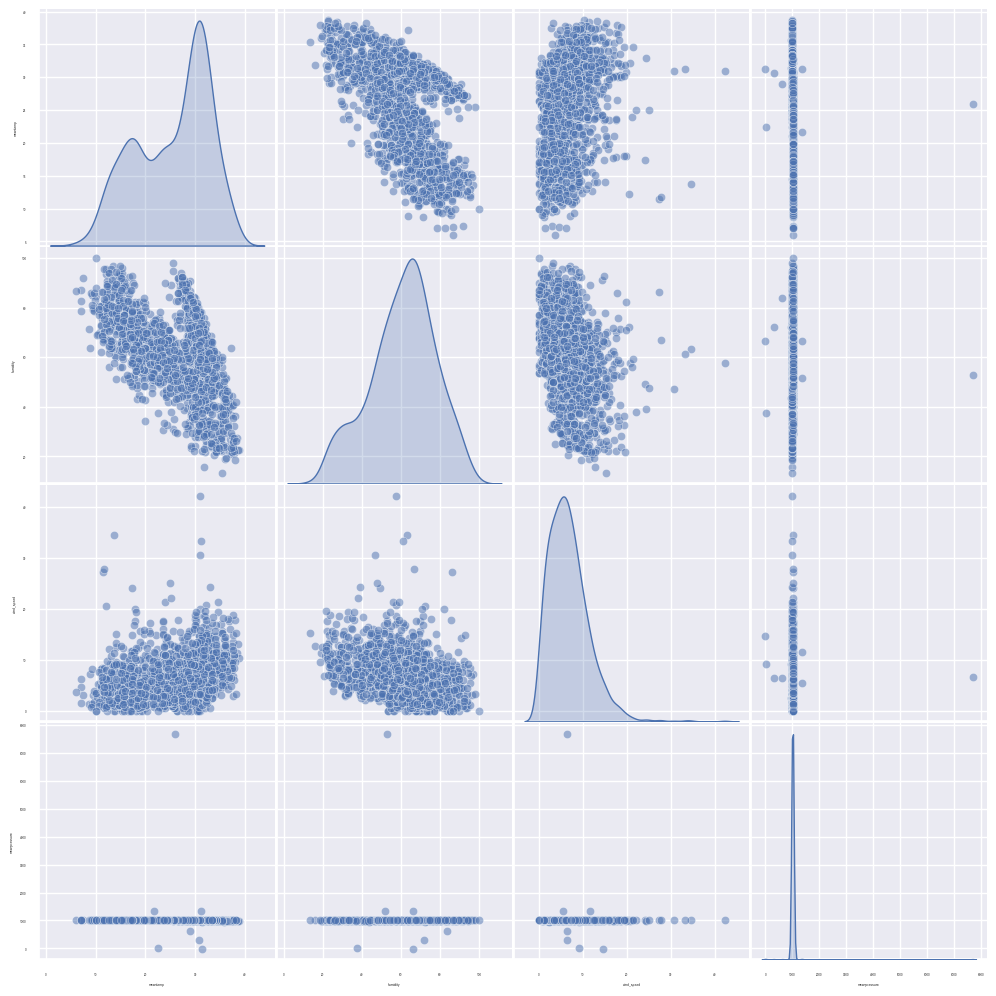

In [11]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.5}, diag_kind='kde')

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'meantemp'),
  Text(0, 1.5, 'humidity'),
  Text(0, 2.5, 'wind_speed'),
  Text(0, 3.5, 'meanpressure')])

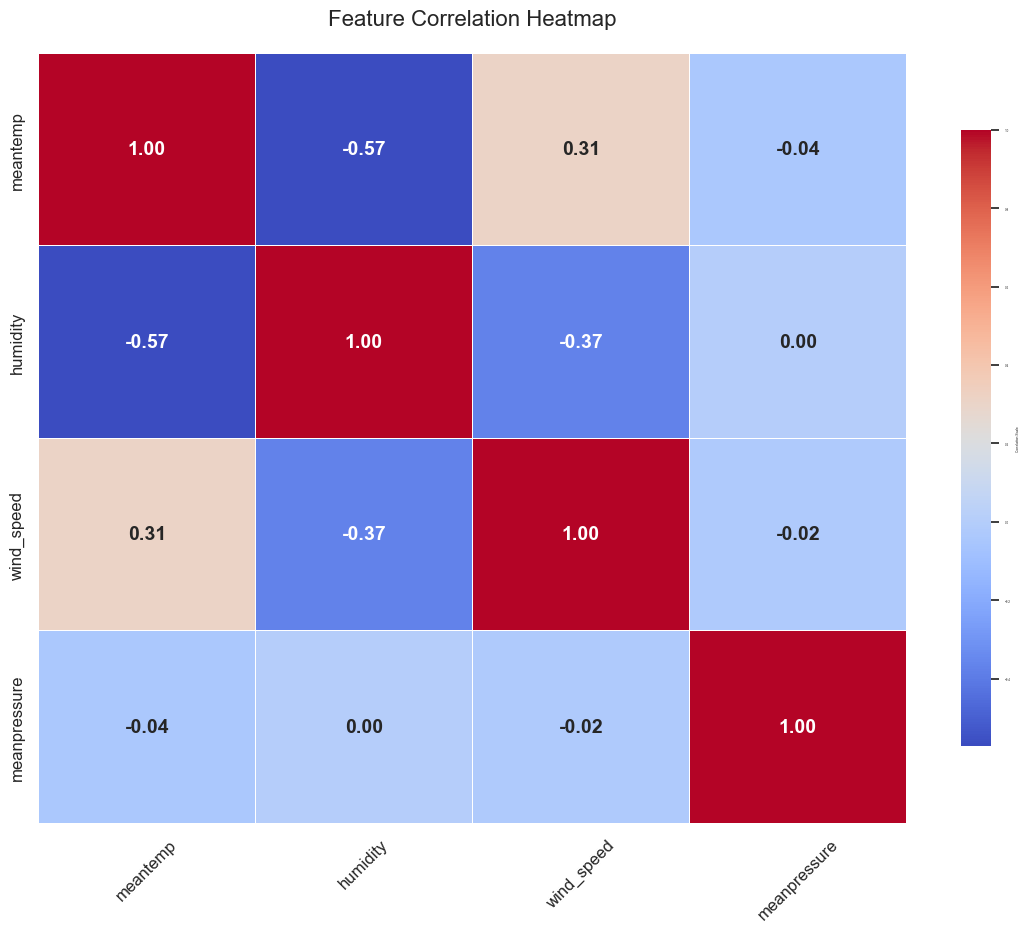

In [12]:
plt.figure(figsize=(14, 10))  # Slightly larger figure for better visibility
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', 
            annot_kws={'size': 14, 'weight': 'bold'},  # Larger, bolder annotations
            fmt='.2f',  # Ensure two decimal places for readability
            linewidths=0.5,  # Add subtle grid lines
            cbar_kws={'shrink': 0.8, 'label': 'Correlation Scale'})  # Clear colorbar label
plt.title('Feature Correlation Heatmap', fontsize=16, pad=20)  # More descriptive title with padding
plt.xticks(fontsize=12, rotation=45)  # Larger x-axis labels
plt.yticks(fontsize=12)  # Larger y-axis labels

In [13]:
# # Scale features using Standardization and Normalization
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Initialize scalers
# standard_scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()

# # Create scaled DataFrames (preserve original data)
# df_standardized = pd.DataFrame(standard_scaler.fit_transform(df), 
#                               columns=df.columns, 
#                               index=df.index)

# df_normalized = pd.DataFrame(minmax_scaler.fit_transform(df), 
#                             columns=df.columns, 
#                             index=df.index)

# # Display first 5 rows of standardized data
# print("Standardized Data:")
# print(df_standardized.head())

# # Display first 5 rows of normalized data
# print("\nNormalized Data:")
# print(df_normalized.head())


In [14]:
# df_normalized.describe()

In [15]:
# df_standardized.describe()

In [16]:
# # Create correlation heatmap for standardized features
# plt.figure(figsize=(14, 12))  # Increased figure size
# heatmap = sns.heatmap(
#     df_standardized.corr(), 
#     annot=True, 
#     cmap='coolwarm', 
#     fmt='.2f',
#     annot_kws={'size': 12, 'weight': 'bold'},  # Larger, bolder annotations
#     linewidths=0.5,  # Add separation between cells
#     linecolor='white',  # Improve cell distinction
#     cbar_kws={'shrink': 0.8}  # Better color bar sizing
# )
# plt.title('Standardized Features Correlation Heatmap', fontsize=16, pad=20)  # Larger title
# heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # Adjust x-axis labels
# heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)  # Adjust y-axis labels


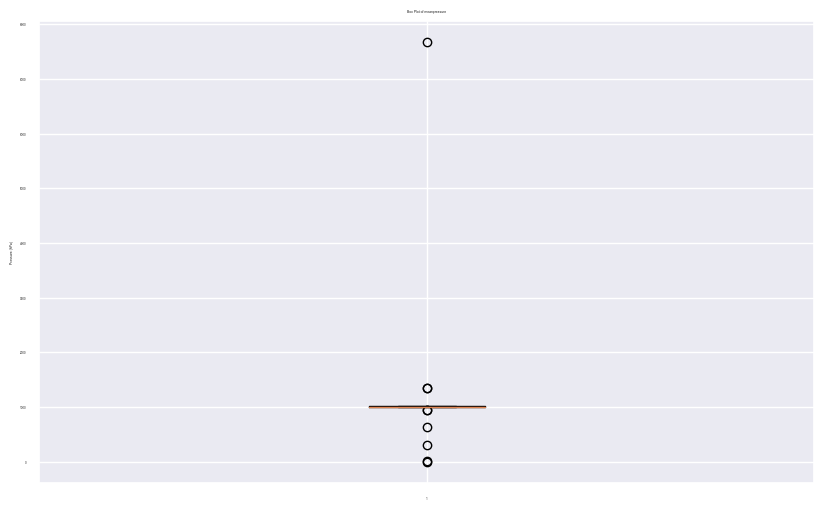

Number of outliers in meanpressure: 9
Example outliers:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2016-03-28  25.933333  52.800000    6.546667   7679.333333
2016-06-09  35.733333  43.733333    9.260000    938.066667
2016-07-24  31.437500  72.250000    2.431250    946.312500
2016-08-02  30.687500  72.125000    6.375000    310.437500
2016-08-14  28.933333  83.700000    6.370000    633.900000


In [17]:
# First, examine the outliers in meanpressure
plt.figure(figsize=(10, 6))
plt.boxplot(df['meanpressure'])
plt.title('Box Plot of meanpressure')
plt.ylabel('Pressure (hPa)')
plt.show()

# Filter out the outliers in meanpressure
# A reasonable range for atmospheric pressure at sea level is ~950-1050 hPa
df_cleaned = df.copy()
pressure_mask = (df_cleaned['meanpressure'] > 950) & (df_cleaned['meanpressure'] < 1050)
outliers = df_cleaned[~pressure_mask]

print(f"Number of outliers in meanpressure: {len(outliers)}")
print("Example outliers:")
print(outliers.head())

# Replace outliers with median or interpolated values
median_pressure = df_cleaned[pressure_mask]['meanpressure'].median()
df_cleaned.loc[~pressure_mask, 'meanpressure'] = median_pressure

# Alternatively, use interpolation (better for time series)
# df_cleaned['meanpressure'] = df_cleaned['meanpressure'].mask(~pressure_mask).interpolate(method='time')

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Option 1: Min-Max Scaling (scale to 0-1 range)
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df_cleaned), 
                         columns=df_cleaned.columns,
                         index=df_cleaned.index)

# Option 2: Standardization (mean=0, std=1)
std_scaler = StandardScaler()
df_standardized = pd.DataFrame(std_scaler.fit_transform(df_cleaned),
                               columns=df_cleaned.columns,
                               index=df_cleaned.index)

# Display the normalized dataframes
print("Min-Max Scaled Data:")
print(df_minmax.head())
print("\nStandardized Data:")
print(df_standardized.head())

Min-Max Scaled Data:
            meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01  0.122271  0.820957    0.000000      0.768116
2013-01-02  0.042795  0.907591    0.070583      0.835573
2013-01-03  0.035662  0.849835    0.109743      0.862978
2013-01-04  0.081514  0.668867    0.029212      0.815547
2013-01-05  0.000000  0.847910    0.087636      0.794466

Standardized Data:
            meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01 -2.109500  1.415439   -1.491699      0.997760
2013-01-02 -2.463454  1.862828   -0.838196      1.285566
2013-01-03 -2.495219  1.564569   -0.475626      1.402487
2013-01-04 -2.291015  0.630022   -1.221233      1.200124
2013-01-05 -2.654044  1.554627   -0.680303      1.110184


In [19]:
# For Prophet, you need to rename columns to 'ds' and 'y'
# Let's say we want to predict meantemp

# Min-Max scaled version
prophet_df_minmax = df_minmax.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# Standardized version
prophet_df_std = df_standardized.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# You can add the other columns as additional regressors
# Keep only the column you want to predict and add others as additional features
additional_features = ['humidity', 'wind_speed', 'meanpressure']
prophet_df_std = df_standardized.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

In [20]:
# After getting predictions from Prophet, you'll need to reverse the normalization

# For Min-Max scaling
def inverse_minmax_transform(normalized_value, feature_idx=0):
    # Get the min and max values used in scaling
    min_val = min_max_scaler.data_min_[feature_idx]
    max_val = min_max_scaler.data_max_[feature_idx]
    # Apply the inverse formula: original = normalized * (max - min) + min
    return normalized_value * (max_val - min_val) + min_val

# For Standardization
def inverse_standard_transform(standardized_value, feature_idx=0):
    # Get the mean and std used in scaling
    mean = std_scaler.mean_[feature_idx]
    std = std_scaler.scale_[feature_idx]
    # Apply the inverse formula: original = standardized * std + mean
    return standardized_value * std + mean

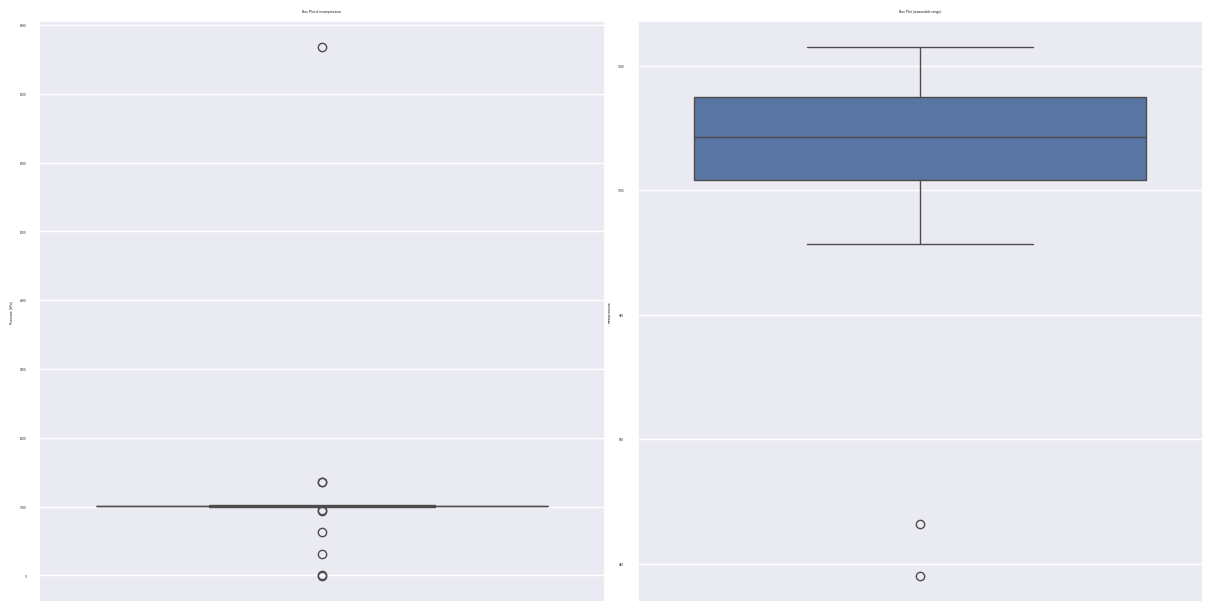

Number of outliers in meanpressure: 9
Percentage of outliers: 0.62%

Sample outliers:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2016-03-28  25.933333  52.800000    6.546667   7679.333333
2016-06-09  35.733333  43.733333    9.260000    938.066667
2016-07-24  31.437500  72.250000    2.431250    946.312500
2016-08-02  30.687500  72.125000    6.375000    310.437500
2016-08-14  28.933333  83.700000    6.370000    633.900000


In [21]:
# Visualize the distribution of meanpressure
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['meanpressure'])
plt.title('Box Plot of meanpressure')
plt.ylabel('Pressure (hPa)')

plt.subplot(1, 2, 2)
# Plot without extreme outliers for better visualization
filtered = df[(df['meanpressure'] > 900) & (df['meanpressure'] < 1100)]
sns.boxplot(y=filtered['meanpressure'])
plt.title('Box Plot (reasonable range)')
plt.tight_layout()
plt.show()

# Count values outside normal atmospheric pressure range
outside_range = df[(df['meanpressure'] < 950) | (df['meanpressure'] > 1050)]
print(f"Number of outliers in meanpressure: {len(outside_range)}")
print(f"Percentage of outliers: {len(outside_range)/len(df)*100:.2f}%")
print("\nSample outliers:")
print(outside_range.head())

Median pressure value from normal range: 1008.5714285714286 hPa

After cleaning:
count    1462.000000
mean     1008.249852
std         7.437428
min       991.375000
25%      1001.625000
50%      1008.563492
75%      1014.875000
max      1023.000000
Name: meanpressure, dtype: float64


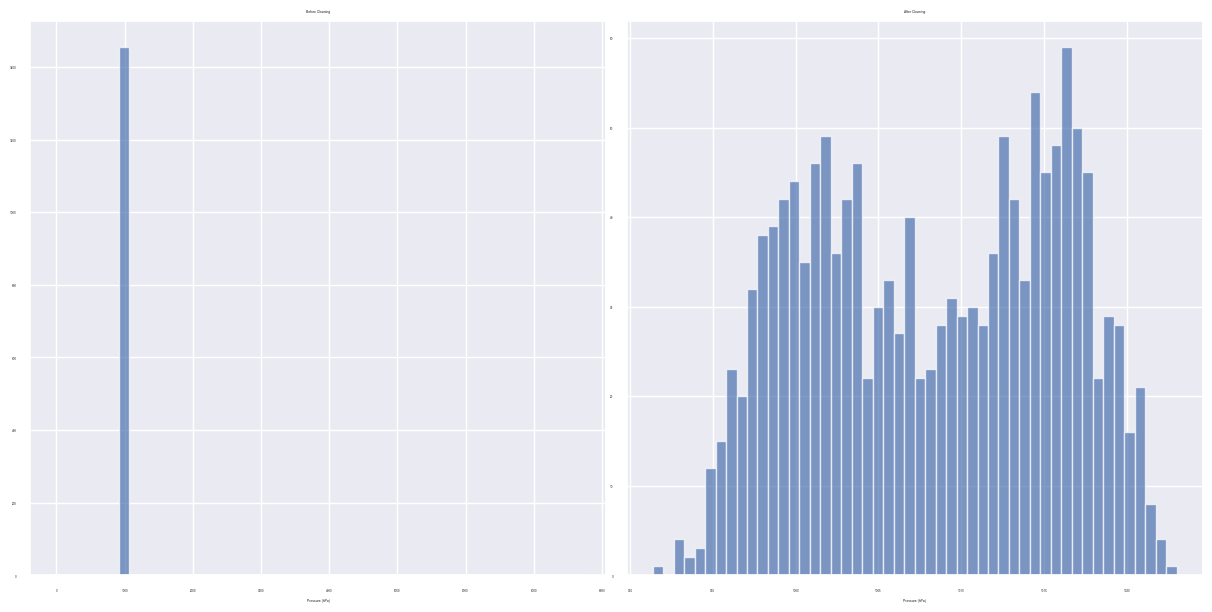

In [22]:
# Create a copy of the dataframe for cleaning
df_clean = df.copy()

# Identify normal range for atmospheric pressure (approximately 950-1050 hPa at sea level)
normal_mask = (df_clean['meanpressure'] >= 950) & (df_clean['meanpressure'] <= 1050)

# Calculate median of normal pressure values
median_pressure = df_clean.loc[normal_mask, 'meanpressure'].median()
print(f"Median pressure value from normal range: {median_pressure} hPa")

# Option 1: Replace outliers with median (simpler approach)
df_clean.loc[~normal_mask, 'meanpressure'] = median_pressure

# Option 2: Advanced - Use time-based interpolation (better for time series)
# First ensure the index is properly sorted
df_temp = df_clean.sort_index()
# Mark outliers as NaN
df_temp.loc[~normal_mask, 'meanpressure'] = np.nan
# Interpolate the NaN values based on time
df_clean = df_temp.interpolate(method='time')

# Verify the cleaning was successful
print("\nAfter cleaning:")
print(df_clean['meanpressure'].describe())

# Compare before and after cleaning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['meanpressure'], bins=50, alpha=0.7)
plt.title('Before Cleaning')
plt.xlabel('Pressure (hPa)')

plt.subplot(1, 2, 2)
plt.hist(df_clean['meanpressure'], bins=50, alpha=0.7)
plt.title('After Cleaning')
plt.xlabel('Pressure (hPa)')
plt.tight_layout()
plt.show()

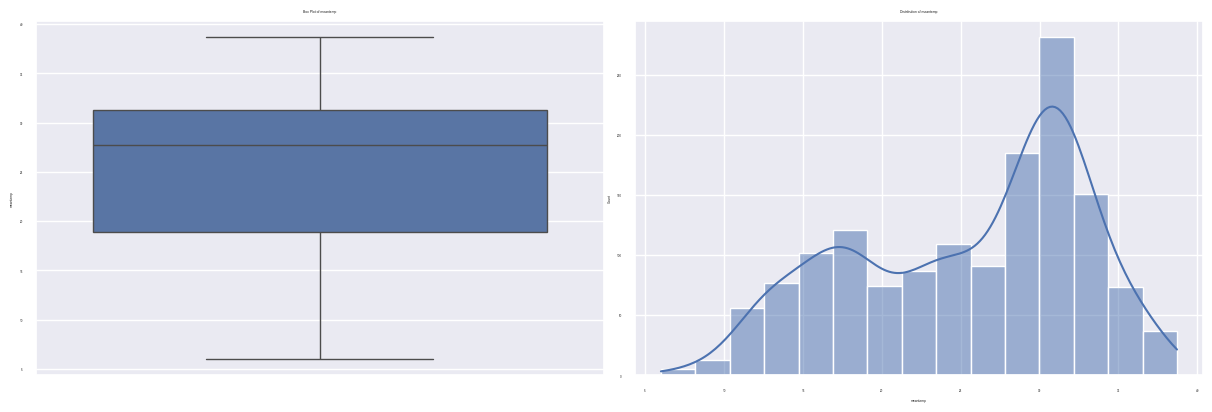


Statistics for meantemp:
count    1462.000000
mean       25.495521
std         7.348103
min         6.000000
25%        18.857143
50%        27.714286
75%        31.305804
max        38.714286
Name: meantemp, dtype: float64


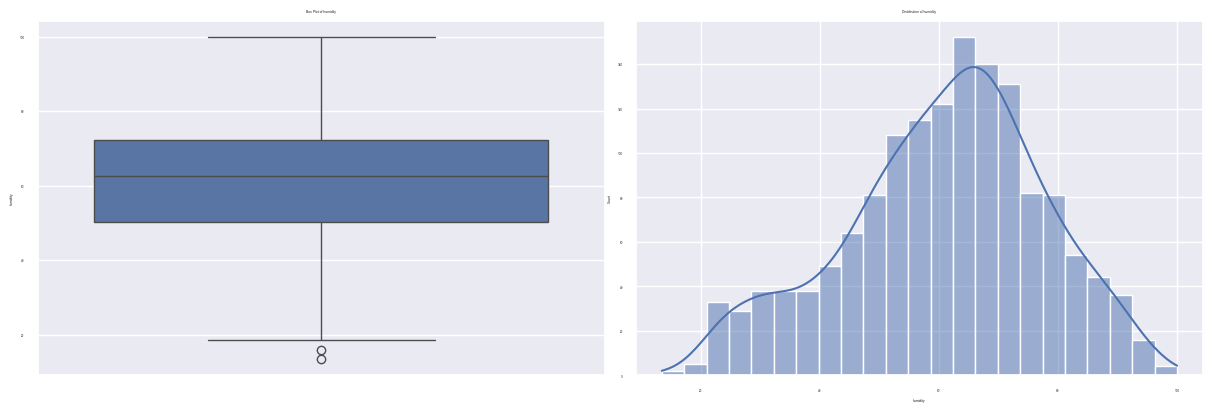


Statistics for humidity:
count    1462.000000
mean       60.771702
std        16.769652
min        13.428571
25%        50.375000
50%        62.625000
75%        72.218750
max       100.000000
Name: humidity, dtype: float64


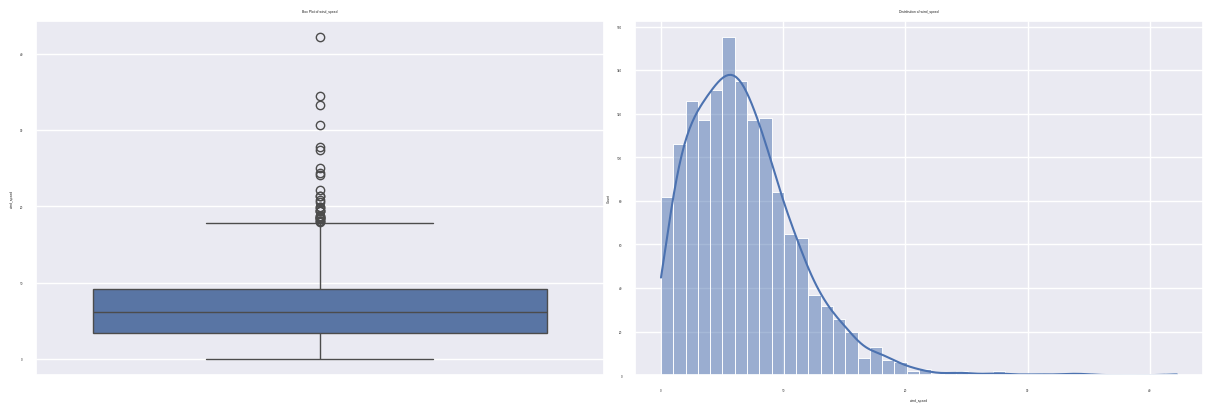


Statistics for wind_speed:
count    1462.000000
mean        6.802209
std         4.561602
min         0.000000
25%         3.475000
50%         6.221667
75%         9.238235
max        42.220000
Name: wind_speed, dtype: float64


In [23]:
# Create a function to examine all columns for potential outliers
def examine_column(dataframe, column):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=dataframe[column])
    plt.title(f'Box Plot of {column}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(dataframe[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()
    
    print(f"\nStatistics for {column}:")
    print(dataframe[column].describe())

# Check each column
for column in ['meantemp', 'humidity', 'wind_speed']:
    examine_column(df_clean, column)

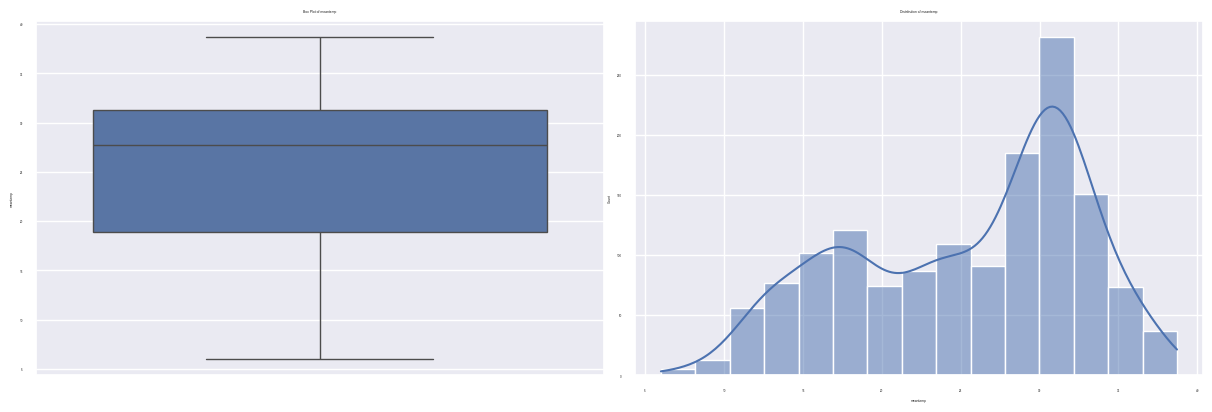


Statistics for meantemp:
count    1462.000000
mean       25.495521
std         7.348103
min         6.000000
25%        18.857143
50%        27.714286
75%        31.305804
max        38.714286
Name: meantemp, dtype: float64


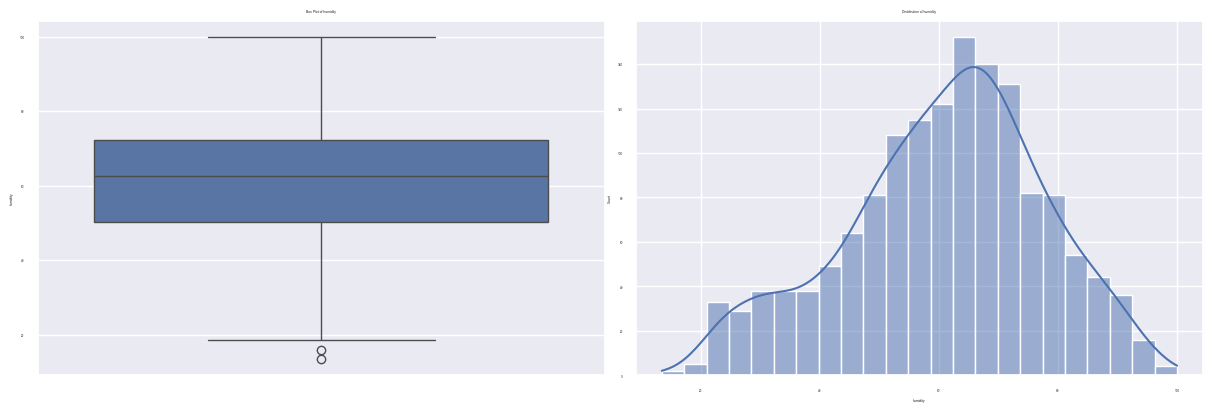


Statistics for humidity:
count    1462.000000
mean       60.771702
std        16.769652
min        13.428571
25%        50.375000
50%        62.625000
75%        72.218750
max       100.000000
Name: humidity, dtype: float64


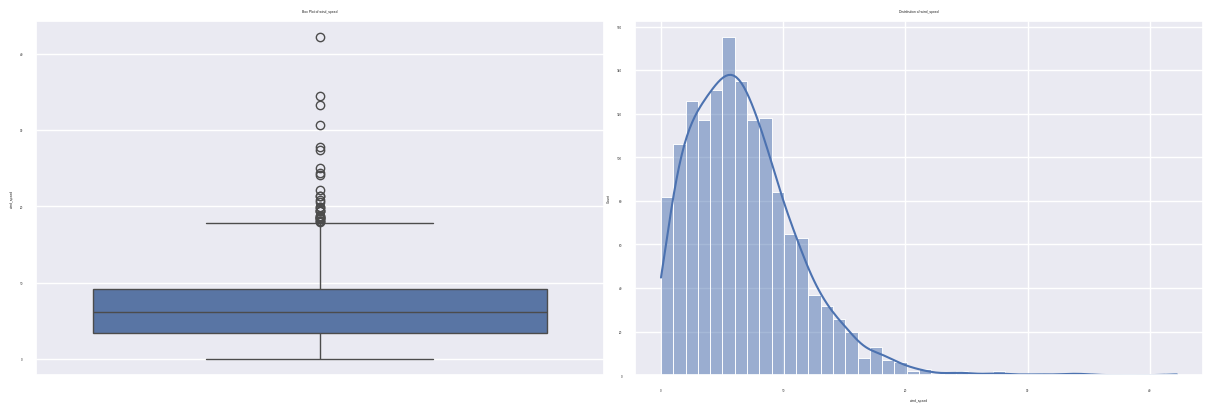


Statistics for wind_speed:
count    1462.000000
mean        6.802209
std         4.561602
min         0.000000
25%         3.475000
50%         6.221667
75%         9.238235
max        42.220000
Name: wind_speed, dtype: float64


In [24]:
# Create a function to examine all columns for potential outliers
def examine_column(dataframe, column):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=dataframe[column])
    plt.title(f'Box Plot of {column}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(dataframe[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()
    
    print(f"\nStatistics for {column}:")
    print(dataframe[column].describe())

# Check each column
for column in ['meantemp', 'humidity', 'wind_speed']:
    examine_column(df_clean, column)

In [25]:
# Handle any additional outliers if found
# Example for wind_speed which might have extreme values
wind_mask = df_clean['wind_speed'] <= 30  # Most common winds are below 30 m/s
if (~wind_mask).any():
    print(f"Found {(~wind_mask).sum()} extreme wind values")
    # Use similar interpolation approach
    df_temp = df_clean.copy()
    df_temp.loc[~wind_mask, 'wind_speed'] = np.nan
    df_clean['wind_speed'] = df_temp['wind_speed'].interpolate(method='time')

# Similar process can be applied to other columns if needed

Found 4 extreme wind values


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Option 1: Standardization (z-score normalization) - better for models like Prophet
scaler = StandardScaler()
df_standardized = pd.DataFrame(
    scaler.fit_transform(df_clean),
    columns=df_clean.columns,
    index=df_clean.index
)

# Option 2: Min-Max scaling to [0,1] range
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(df_clean),
    columns=df_clean.columns,
    index=df_clean.index
)

# Display the normalized dataframes
print("Standardized Data (first 5 rows):")
print(df_standardized.head())
print("\nMin-Max Scaled Data (first 5 rows):")
print(df_minmax.head())

# Save the cleaned and normalized data
df_clean.to_csv('DailyDelhiClimate_Cleaned.csv')
df_standardized.to_csv('DailyDelhiClimate_Standardized.csv')
df_minmax.to_csv('DailyDelhiClimate_MinMaxScaled.csv')

Standardized Data (first 5 rows):
            meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01 -2.109500  1.415439   -1.560999      0.997570
2013-01-02 -2.463454  1.862828   -0.869340      1.284505
2013-01-03 -2.495219  1.564569   -0.485600      1.401073
2013-01-04 -2.291015  0.630022   -1.274742      1.199321
2013-01-05 -2.654044  1.554627   -0.702227      1.109654

Min-Max Scaled Data (first 5 rows):
            meantemp  humidity  wind_speed  meanpressure
date                                                    
2013-01-01  0.122271  0.820957    0.000000      0.768116
2013-01-02  0.042795  0.907591    0.107291      0.835573
2013-01-03  0.035662  0.849835    0.166817      0.862978
2013-01-04  0.081514  0.668867    0.044404      0.815547
2013-01-05  0.000000  0.847910    0.133213      0.794466


In [27]:
# Final verification of the entire dataset
print("Original data statistics:")
print(df.describe())
print("\nCleaned data statistics:")
print(df_clean.describe())
print("\nAll columns in final dataset:")
for col in df_clean.columns:
    print(f"{col}: Range [{df_clean[col].min():.2f} to {df_clean[col].max():.2f}]")

Original data statistics:
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

Cleaned data statistics:
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.725529   1008.249852
std       7.348103    16.769652     4.309951      7.437428
min       6.000000    13.428571     0.000000    991.375000
25%      18.857143    50.375000     3.475000   1001.625000
50%      27.714286    62.625000     6.173810   1008.563492
75% 

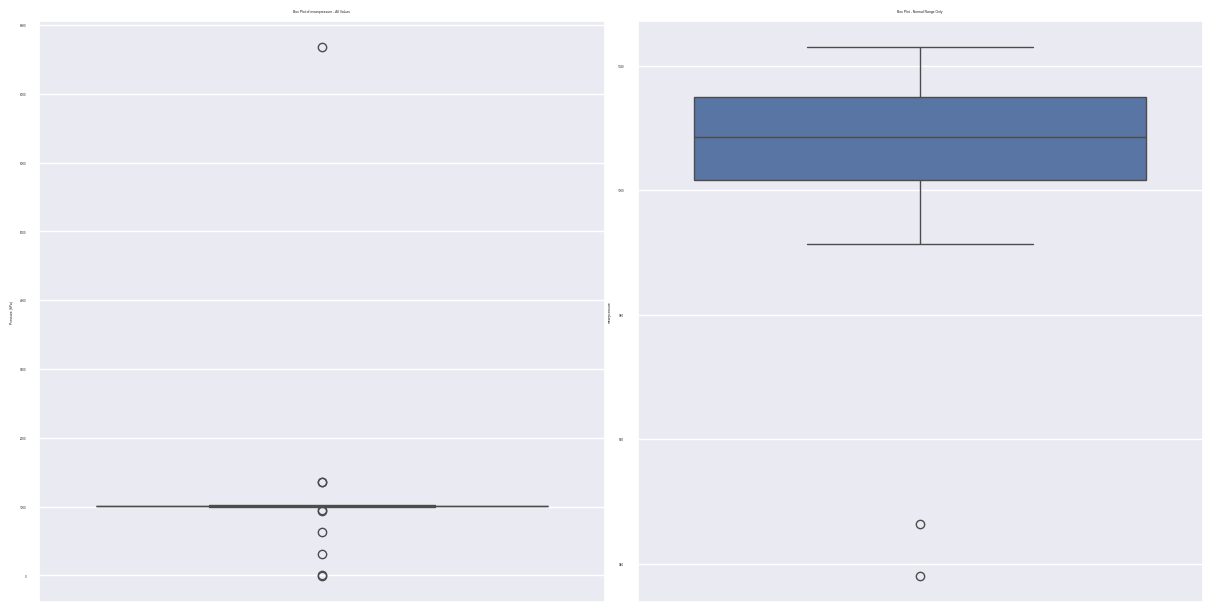

Number of anomalies found: 9
Percentage of dataset: 0.62%

Sample of anomalous records:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2016-03-28  25.933333  52.800000    6.546667   7679.333333
2016-06-09  35.733333  43.733333    9.260000    938.066667
2016-07-24  31.437500  72.250000    2.431250    946.312500
2016-08-02  30.687500  72.125000    6.375000    310.437500
2016-08-14  28.933333  83.700000    6.370000    633.900000


In [28]:
# Visualize the meanpressure distribution to identify outliers
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['meanpressure'])
plt.title('Box Plot of meanpressure - All Values')
plt.ylabel('Pressure (hPa)')

plt.subplot(1, 2, 2)
# Filter to show normal atmospheric pressure range
filtered = df[(df['meanpressure'] > 900) & (df['meanpressure'] < 1100)]
sns.boxplot(y=filtered['meanpressure'])
plt.title('Box Plot - Normal Range Only')
plt.tight_layout()
plt.show()

# Count and examine anomalous values
anomalies = df[(df['meanpressure'] < 950) | (df['meanpressure'] > 1050)]
print(f"Number of anomalies found: {len(anomalies)}")
print(f"Percentage of dataset: {len(anomalies)/len(df)*100:.2f}%")
print("\nSample of anomalous records:")
print(anomalies.head())

Fixing 9 anomalous pressure values out of 1462 records
Reference median pressure: 1008.57 hPa
Fixing 4 extreme wind speed values

Before cleaning:
       meanpressure   wind_speed
count   1462.000000  1462.000000
mean    1011.104548     6.802209
std      180.231668     4.561602
min       -3.041667     0.000000
25%     1001.580357     3.475000
50%     1008.563492     6.221667
75%     1014.944901     9.238235
max     7679.333333    42.220000

After cleaning:
       meanpressure   wind_speed
count   1462.000000  1462.000000
mean    1008.249852     6.725529
std        7.437428     4.309951
min      991.375000     0.000000
25%     1001.625000     3.475000
50%     1008.563492     6.173810
75%     1014.875000     9.179911
max     1023.000000    27.775000


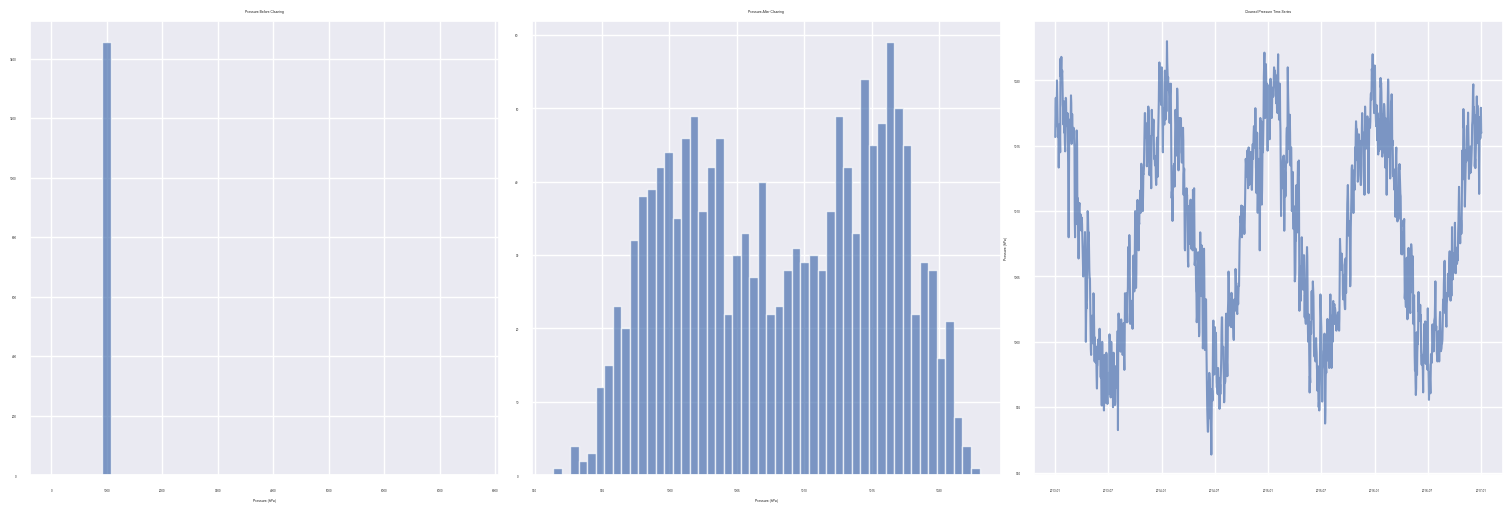

Cleaned data saved to DailyDelhiClimateTrain_cleaned.csv


In [29]:
# Create a copy of the dataframe for cleaning
df_clean = df.copy()

# Step 1: Clean the meanpressure column (this has the most severe anomalies)
# Define normal atmospheric pressure range (950-1050 hPa)
normal_pressure_mask = (df_clean['meanpressure'] >= 950) & (df_clean['meanpressure'] <= 1050)

# Print information about the outliers we're fixing
outliers_count = (~normal_pressure_mask).sum()
print(f"Fixing {outliers_count} anomalous pressure values out of {len(df_clean)} records")

# Option 1: Replace with rolling median (better than simple median)
# Calculate the median of normal pressure values as a fallback
median_pressure = df_clean.loc[normal_pressure_mask, 'meanpressure'].median()
print(f"Reference median pressure: {median_pressure:.2f} hPa")

# Create a temporary dataframe for interpolation
df_temp = df_clean.copy()
# Mark outliers as NaN
df_temp.loc[~normal_pressure_mask, 'meanpressure'] = np.nan
# Use time-based interpolation to fill the gaps
df_clean['meanpressure'] = df_temp['meanpressure'].interpolate(method='time')

# If any NaN values remain at the edges where interpolation can't fill, use the median
if df_clean['meanpressure'].isna().any():
    df_clean['meanpressure'] = df_clean['meanpressure'].fillna(median_pressure)

# Step 2: Check for extreme values in wind_speed
wind_mask = df_clean['wind_speed'] <= 30  # Most common winds are below 30 m/s
if (~wind_mask).any():
    wind_outliers = (~wind_mask).sum()
    print(f"Fixing {wind_outliers} extreme wind speed values")
    # Similar interpolation approach for wind
    df_temp = df_clean.copy()
    df_temp.loc[~wind_mask, 'wind_speed'] = np.nan
    df_clean['wind_speed'] = df_temp['wind_speed'].interpolate(method='time')
    # Fill any remaining NaN values
    if df_clean['wind_speed'].isna().any():
        median_wind = df_clean.loc[wind_mask, 'wind_speed'].median()
        df_clean['wind_speed'] = df_clean['wind_speed'].fillna(median_wind)

# Step 3: Verify the cleaning results
print("\nBefore cleaning:")
print(df[['meanpressure', 'wind_speed']].describe())
print("\nAfter cleaning:")
print(df_clean[['meanpressure', 'wind_speed']].describe())

# Step 4: Visualize the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(df['meanpressure'], bins=50, alpha=0.7)
plt.title('Pressure Before Cleaning')
plt.xlabel('Pressure (hPa)')

plt.subplot(1, 3, 2)
plt.hist(df_clean['meanpressure'], bins=50, alpha=0.7)
plt.title('Pressure After Cleaning')
plt.xlabel('Pressure (hPa)')

plt.subplot(1, 3, 3)
plt.plot(df_clean.index, df_clean['meanpressure'], 'b-', alpha=0.7)
plt.title('Cleaned Pressure Time Series')
plt.ylabel('Pressure (hPa)')
plt.tight_layout()
plt.show()

# Save the cleaned dataset
df_clean.to_csv("DailyDelhiClimateTrain_cleaned.csv")
print("Cleaned data saved to DailyDelhiClimateTrain_cleaned.csv")

Checking outliers in cleaned dataframe (df_clean)

--- Outlier Analysis for meanpressure ---
Normal range: 950.00 to 1050.00
Actual range: 991.38 to 1023.00
Number of outliers: 0 (0.00%)


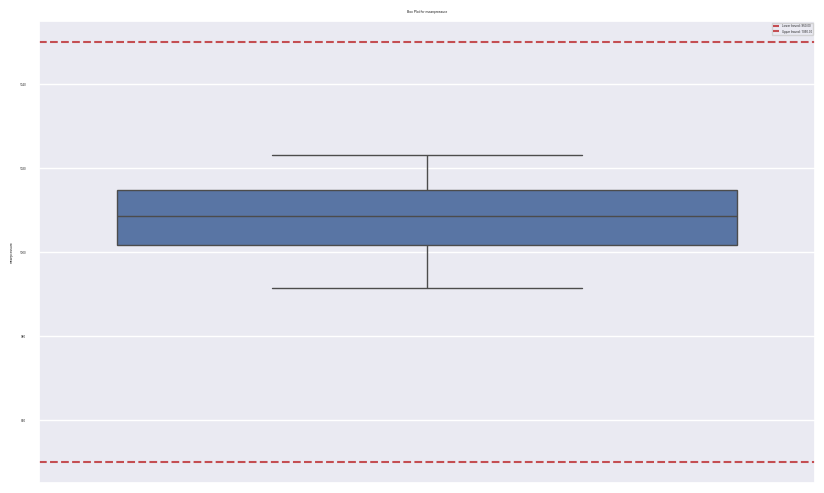


--- Outlier Analysis for meantemp ---
Normal range: 0.18 to 49.98
Actual range: 6.00 to 38.71
Number of outliers: 0 (0.00%)


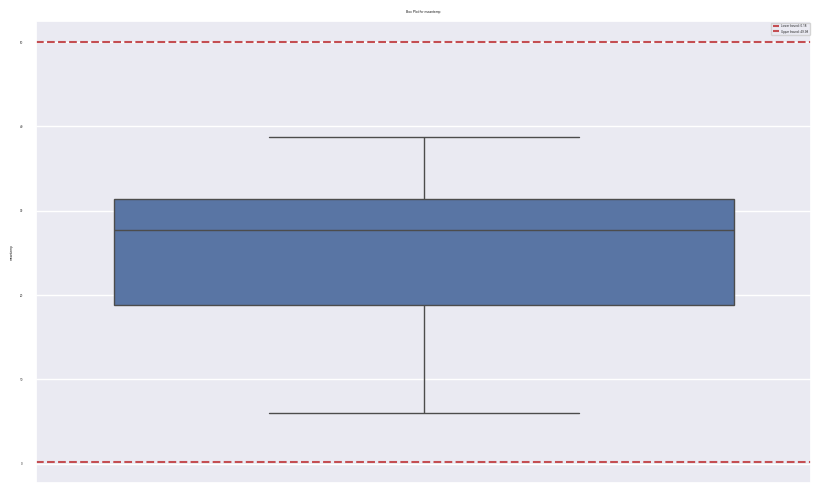


--- Outlier Analysis for humidity ---
Normal range: 17.61 to 104.98
Actual range: 13.43 to 100.00
Number of outliers: 2 (0.14%)
Sample outliers:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-05-01  31.857143  15.857143   12.685714   1002.833333
2015-05-07  35.428571  13.428571   15.342857   1003.571429


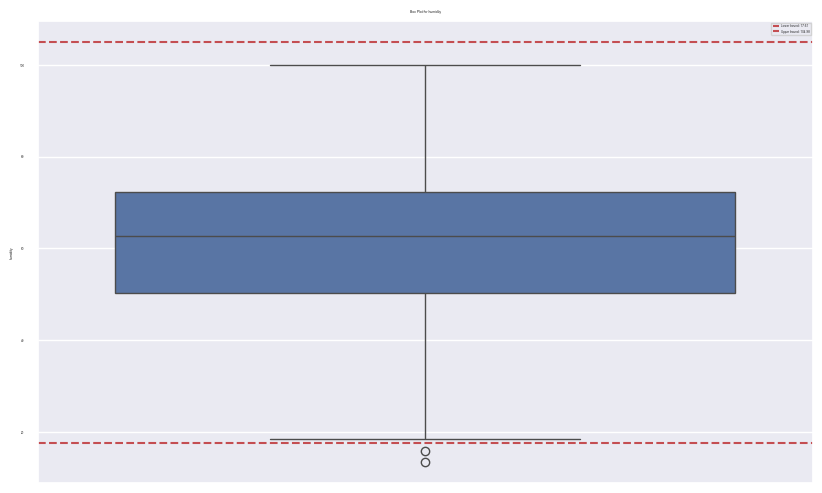


--- Outlier Analysis for wind_speed ---
Normal range: -5.08 to 17.74
Actual range: 0.00 to 27.77
Number of outliers: 28 (1.92%)
Sample outliers:
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-03-01  17.333333  49.333333   24.066667   1016.333333
2013-08-24  32.000000  71.250000   18.525000   1000.333333
2013-11-08  18.000000  82.200000   19.912500   1015.625000
2014-01-06  11.428571  86.285714   27.337500   1017.625000
2014-01-07  12.142857  72.285714   20.600000   1017.750000


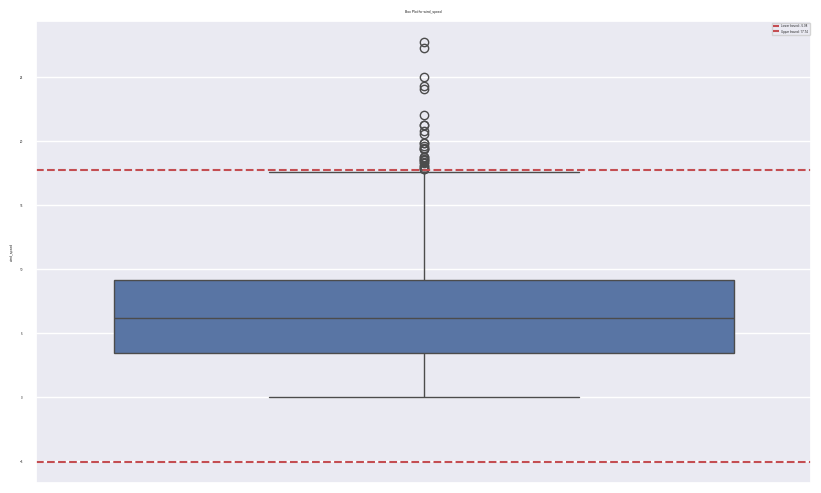


--- Outlier Summary ---
Total records: 1462
meanpressure: 0 outliers
meantemp: 0 outliers
humidity: 2 outliers
wind_speed: 28 outliers


In [30]:
# Check if cleaned dataframe exists, otherwise use original dataframe
try:
    # Try to access df_clean (the cleaned dataframe)
    df_to_check = df_clean
    print("Checking outliers in cleaned dataframe (df_clean)")
except NameError:
    # If df_clean doesn't exist, use the original dataframe
    df_to_check = df
    print("Checking outliers in original dataframe (df)")

# Define function to check for outliers using boxplot and statistics
def check_outliers(dataframe, column, lower_bound=None, upper_bound=None):
    """Check for outliers in a specific column using IQR method"""
    # Calculate IQR
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds if not provided
    if lower_bound is None:
        lower_bound = Q1 - 1.5 * IQR
    if upper_bound is None:
        upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | 
                         (dataframe[column] > upper_bound)]
    
    # Print results
    print(f"\n--- Outlier Analysis for {column} ---")
    print(f"Normal range: {lower_bound:.2f} to {upper_bound:.2f}")
    print(f"Actual range: {dataframe[column].min():.2f} to {dataframe[column].max():.2f}")
    print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(dataframe)*100:.2f}%)")
    
    if len(outliers) > 0:
        print("Sample outliers:")
        print(outliers.head())
    
    # Create boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dataframe[column])
    plt.axhline(y=lower_bound, color='r', linestyle='--', label=f'Lower bound: {lower_bound:.2f}')
    plt.axhline(y=upper_bound, color='r', linestyle='--', label=f'Upper bound: {upper_bound:.2f}')
    plt.title(f'Box Plot for {column}')
    plt.ylabel(column)
    plt.legend()
    plt.show()
    
    return len(outliers)

# Check each column with appropriate bounds
# For atmospheric pressure, use physical constraints
outliers_pressure = check_outliers(df_to_check, 'meanpressure', 950, 1050)

# For other columns, use statistical outlier detection
outliers_temp = check_outliers(df_to_check, 'meantemp')
outliers_humidity = check_outliers(df_to_check, 'humidity')
outliers_wind = check_outliers(df_to_check, 'wind_speed')

# Summary of all outliers
print("\n--- Outlier Summary ---")
print(f"Total records: {len(df_to_check)}")
print(f"meanpressure: {outliers_pressure} outliers")
print(f"meantemp: {outliers_temp} outliers")
print(f"humidity: {outliers_humidity} outliers")
print(f"wind_speed: {outliers_wind} outliers")

Found 9 pressure outliers out of 1462 records
Found 4 wind outliers


c:\Users\talim\miniconda3\envs\tf_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training Prophet model...


02:53:40 - cmdstanpy - INFO - Chain [1] start processing
02:53:40 - cmdstanpy - INFO - Chain [1] done processing


Model training complete!
Generating forecast...


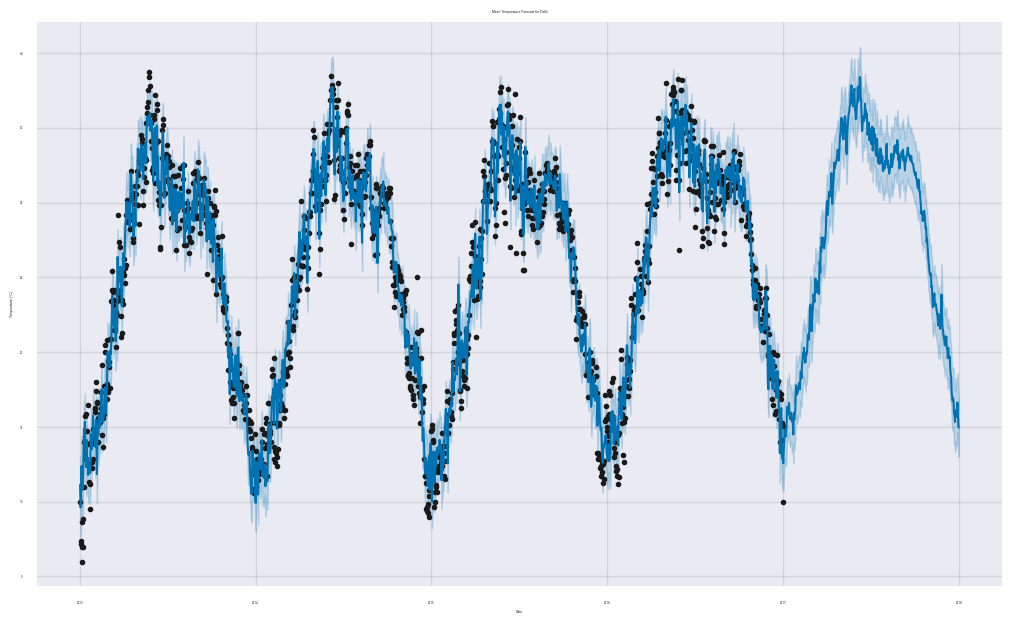

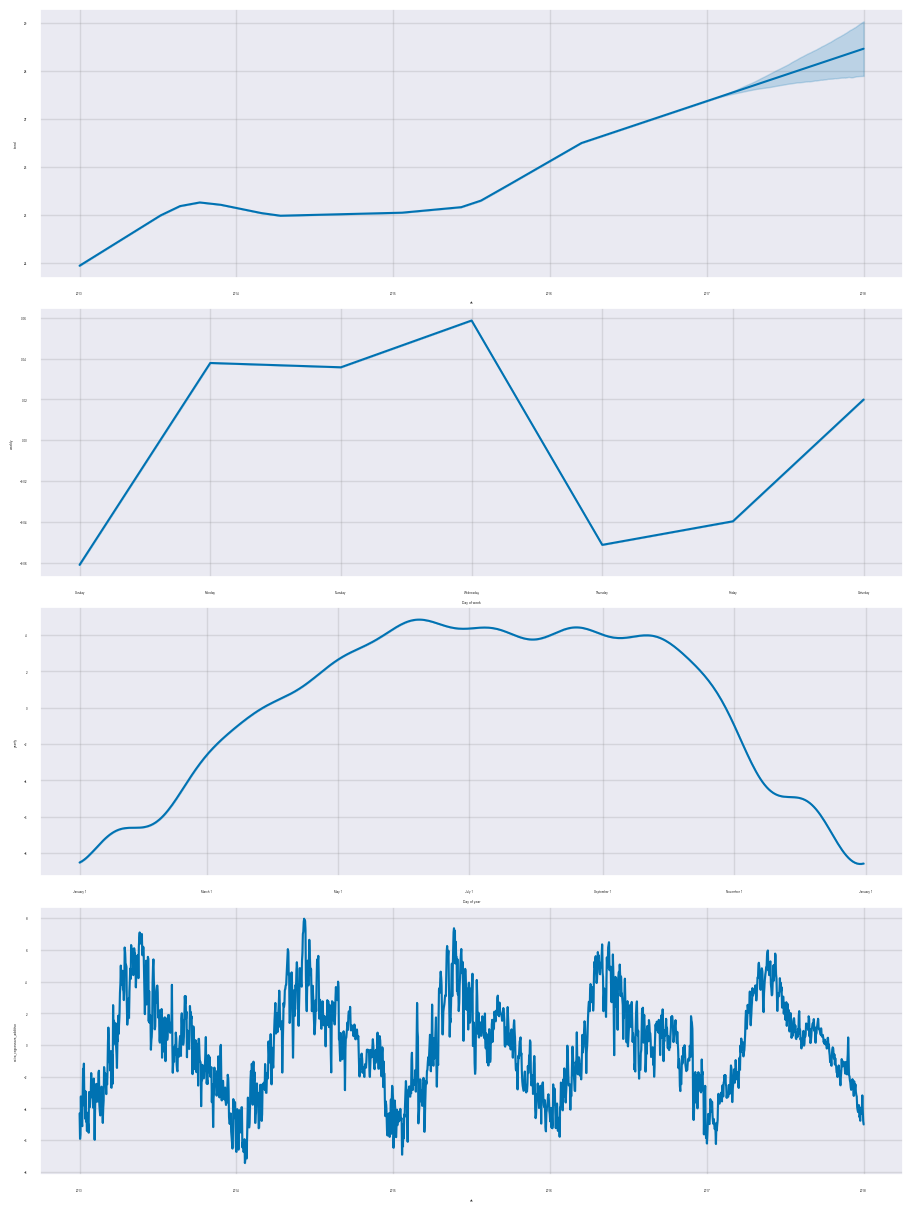

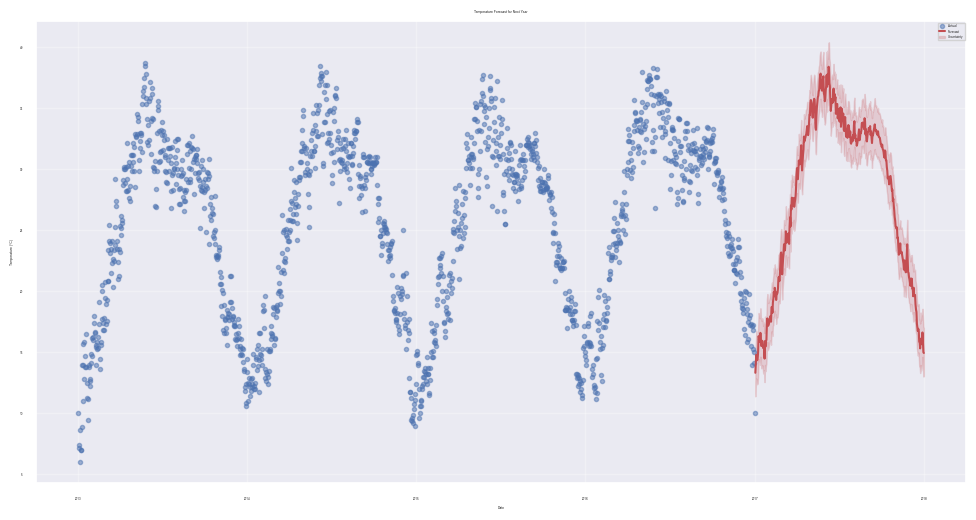

Model and forecast saved to files.

Forecast Summary:
Current average temperature: 25.50°C
Forecasted average temperature for next year: 27.93°C
Maximum forecasted temperature: 38.41°C on 2017-06-09
Minimum forecasted temperature: 13.33°C on 2017-01-02


In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import pickle

# Step 1: Load the original data
df = pd.read_csv("DailyDelhiClimateTrain.csv", index_col="date", parse_dates=True)

# Step 2: Clean the data 
# Create a copy of the dataframe for cleaning
df_clean = df.copy()

# Clean the meanpressure column
normal_pressure_mask = (df_clean['meanpressure'] >= 950) & (df_clean['meanpressure'] <= 1050)
print(f"Found {(~normal_pressure_mask).sum()} pressure outliers out of {len(df_clean)} records")

# Use time-based interpolation for meanpressure
df_temp = df_clean.copy()
df_temp.loc[~normal_pressure_mask, 'meanpressure'] = np.nan
df_clean['meanpressure'] = df_temp['meanpressure'].interpolate(method='time')

# If any NaN values remain at the edges, use median
median_pressure = df_clean.loc[normal_pressure_mask, 'meanpressure'].median()
df_clean['meanpressure'] = df_clean['meanpressure'].fillna(median_pressure)

# Clean wind_speed if needed
wind_mask = df_clean['wind_speed'] <= 30
if (~wind_mask).any():
    print(f"Found {(~wind_mask).sum()} wind outliers")
    df_temp = df_clean.copy()
    df_temp.loc[~wind_mask, 'wind_speed'] = np.nan
    df_clean['wind_speed'] = df_temp['wind_speed'].interpolate(method='time')
    df_clean['wind_speed'] = df_clean['wind_speed'].fillna(df_clean.loc[wind_mask, 'wind_speed'].median())

# Step 3: Prepare the data for Prophet (which requires 'ds' and 'y' columns)
prophet_df = df_clean.reset_index().rename(columns={'date': 'ds', 'meantemp': 'y'})

# Step 4: Create and train the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive'
)

# Add the other weather variables as regressors
model.add_regressor('humidity')
model.add_regressor('wind_speed')
model.add_regressor('meanpressure')

# Fit the model
print("Training Prophet model...")
model.fit(prophet_df)
print("Model training complete!")

# Step 5: Make future forecasts
# Create future dataframe for 365 days
future = model.make_future_dataframe(periods=365)

# Add regressor values for the known period
future = future.merge(prophet_df[['ds', 'humidity', 'wind_speed', 'meanpressure']], 
                     on='ds', how='left')

# For the future period, use seasonal averages
future_unknown = future[future['humidity'].isna()].copy()
known_data = prophet_df.copy()

# Add day of year to both dataframes
known_data['doy'] = known_data['ds'].dt.dayofyear
future_unknown['doy'] = future_unknown['ds'].dt.dayofyear

# For each day in future_unknown, find the average values from the same day of year
for idx, row in future_unknown.iterrows():
    doy = row['doy']
    # Get mean values for this day of year
    matches = known_data[known_data['doy'] == doy]
    future.loc[idx, 'humidity'] = matches['humidity'].mean()
    future.loc[idx, 'wind_speed'] = matches['wind_speed'].mean()
    future.loc[idx, 'meanpressure'] = matches['meanpressure'].mean()

# Step 6: Generate forecast
print("Generating forecast...")
forecast = model.predict(future)

# Step 7: Visualize results
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Mean Temperature Forecast for Delhi')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

# Plot just the forecast for next year
plt.figure(figsize=(12, 6))
# Actual values
plt.plot(prophet_df['ds'], prophet_df['y'], 'b.', alpha=0.5, label='Actual')
# Forecast values - focusing on future only
future_only = forecast[forecast['ds'] > prophet_df['ds'].max()]
plt.plot(future_only['ds'], future_only['yhat'], 'r-', label='Forecast')
plt.fill_between(future_only['ds'], future_only['yhat_lower'], future_only['yhat_upper'], 
                 color='r', alpha=0.2, label='Uncertainty')
plt.title('Temperature Forecast for Next Year')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Save the model and forecast
with open('delhi_temp_prophet_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save forecast to CSV
forecast.to_csv('delhi_temp_forecast.csv')
print("Model and forecast saved to files.")

# Print forecast summary
print("\nForecast Summary:")
print(f"Current average temperature: {prophet_df['y'].mean():.2f}°C")
future_only = forecast[forecast['ds'] > prophet_df['ds'].max()]
print(f"Forecasted average temperature for next year: {future_only['yhat'].mean():.2f}°C")
print(f"Maximum forecasted temperature: {future_only['yhat'].max():.2f}°C on {future_only.loc[future_only['yhat'].idxmax(), 'ds'].strftime('%Y-%m-%d')}")
print(f"Minimum forecasted temperature: {future_only['yhat'].min():.2f}°C on {future_only.loc[future_only['yhat'].idxmin(), 'ds'].strftime('%Y-%m-%d')}")

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = prophet_df['y']  # Actual values
y_pred = forecast.loc[:len(y_true)-1, 'yhat']  # Model predictions for known period

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 1.17, RMSE: 1.51


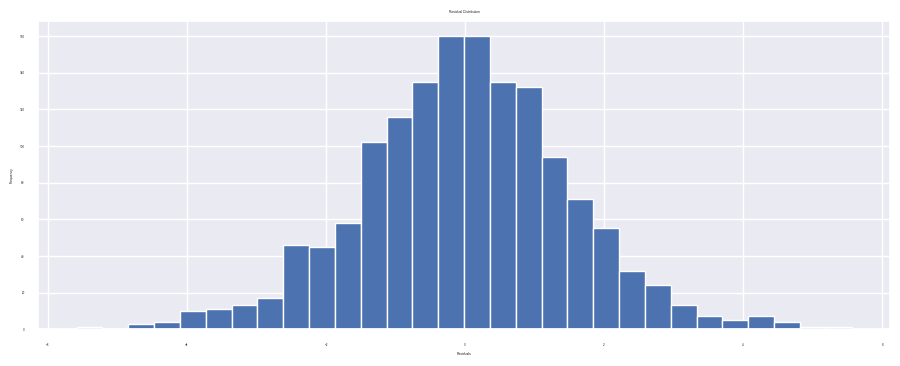

In [33]:
residuals = y_true - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


In [34]:
model = Prophet(
    changepoint_prior_scale=0.05,  # Controls flexibility of trend
    seasonality_prior_scale=10,  # Adjusts importance of seasonal patterns
    yearly_seasonality=True
)


In [36]:
forecast.to_csv('delhi_temp_forecast_updated.csv', index=False)


In [37]:
with open("prophet_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load the model later
with open("prophet_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
